# Convolutional Neural Network : CIFAR-10
---
#### 실습목표
1. CNN의 기본 아이디어를 안다.
2. CNN의 구조를 그리고, 코드로 옮길 수 있다.

## Real Game : CNN on CIFAR-10

여기에서는 여러분이 직접 코드를 완성해야 하는 문제가 곳곳에 있습니다!

In [1]:
'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

### Data Loading

In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [4]:
labels = {0 : 'Airplane',
          1 : 'Automobile',
          2 : 'Bird',
          3 : 'Cat',
          4 : 'Deer',
          5 : 'Dog',
          6 : 'Frog',
          7 : 'Horse',
          8 : 'Ship',
          9 : 'Truck' }

print(labels)

{0: 'Airplane', 1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer', 5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}


id = 8564
다음 그림은 Automobile 입니다.


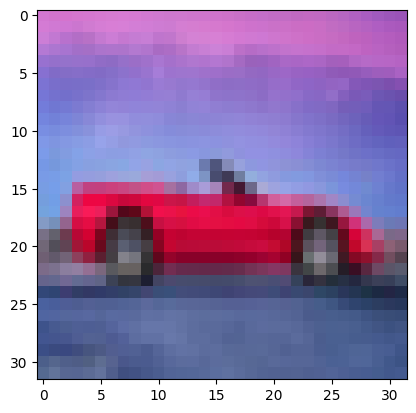

In [5]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id][0]]} 입니다.')
plt.imshow(test_x[id])
plt.show()

### X : 표준화 Scaling (standardization)

$$ X_{scaled} = {{x_{original} - mean(x)}\over{std(x)} } $$

* 한꺼번에 Standardization 적용

In [6]:
mean_n, std_n = train_x.mean(), train_x.std()
mean_n, std_n

(120.70756512369792, 64.1500758911213)

In [7]:
train_x = (train_x - mean_n) / std_n
test_x = (test_x - mean_n) / std_n

In [8]:
train_x.mean(), train_x.std()

(-2.5247951877342226e-17, 1.0000000000000022)

* 채널별로 Standardization 적용

In [9]:
tr_r_mean, tr_r_std = train_x[:,:,:,0].mean(), train_x[:,:,:,0].std()
tr_g_mean, tr_g_std = train_x[:,:,:,1].mean(), train_x[:,:,:,1].std()
tr_b_mean, tr_b_std = train_x[:,:,:,2].mean(), train_x[:,:,:,2].std()

In [10]:
train_x_r = (train_x[:,:,:,0] - tr_r_mean) / tr_r_std
train_x_g = (train_x[:,:,:,1] - tr_g_mean) / tr_g_std
train_x_b = (train_x[:,:,:,2] - tr_b_mean) / tr_b_std

In [11]:
train_x_r.shape, train_x_g.shape, train_x_b.shape

((50000, 32, 32), (50000, 32, 32), (50000, 32, 32))

In [12]:
train_x = np.stack( (train_x_r, train_x_g, train_x_b), axis=3 )

In [13]:
test_x_r = (test_x[:,:,:,0] - tr_r_mean) / tr_r_std
test_x_g = (test_x[:,:,:,1] - tr_g_mean) / tr_g_std
test_x_b = (test_x[:,:,:,2] - tr_b_mean) / tr_b_std

In [14]:
test_x = np.stack( (test_x_r, test_x_g, test_x_b), axis=3 )

In [15]:
train_x.shape, test_x.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

### Y : One-Hot Encoding

In [16]:
train_y.shape

(50000, 1)

In [17]:
train_y = np.ravel(train_y)
test_y = np.ravel(test_y)

In [18]:
train_y.shape

(50000,)

In [19]:
class_n = len(np.unique(train_y))

In [20]:
from tensorflow.keras.utils import to_categorical

In [21]:
# 반복 실행 주의!

train_y = to_categorical(train_y, class_n)
test_y = to_categorical(test_y, class_n)

In [22]:
train_x.shape, train_y.shape

((50000, 32, 32, 3), (50000, 10))

### Modeling

- EarlyStopping 의 옵션도 조절해보자.
- .fit( )
- .predict( )
---

- **자유롭게 먼저 해보는 것을 추천**

---

- **구조를 따라서 코딩을 한다면**
    0. Functional, Sequential 중 택일
    1. 인풋레이어
    2. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    3. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    4. BatchNormalization
    5. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    6. DropOut : 25% 비활성화
    7. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    8. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    9. BatchNormalization
    10. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    11. DropOut : 25% 비활성화
    12. Flatten( )
    13. Fully Connected Layer : 노드 1024개
    14. BatchNormalization
    15. DropOut : 35% 비활성화
    16. 아웃풋레이어



In [23]:
import tensorflow as tf
from tensorflow import keras

In [24]:
## Sequential API
# 1. 세션 클리어 : 메모리에 남아있는 모델 구조를 지워줘!
keras.backend.clear_session()

# 2. 모델 발판 생성 : 레이어 블록을 조립할 발판!
model1 = keras.models.Sequential()

# 3. 레이어 블록 조립 : .add( )
# 인풋레이어
model1.add( keras.layers.Input(shape=(32,32,3)) )

# Convolution : 필터수 32개, 사이즈(3, 3), same padding
model1.add( keras.layers.Conv2D(filters=32,          # 새롭게 제작하려는 feature map의 수! or 서로 다른 filters 수!
                                kernel_size=(3,3),   # Conv2D 필터의 가로세로 사이즈 # depth는 자동 보정!
                                strides=(1,1),       # Conv2D 필터의 이동 보폭!
                                padding='same',      # 1. 이전 feature map 사이즈 유지 | 2. 외곽 정보를 더 반영!
                                activation='relu',   # 주의!
                                ) )
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
model1.add( keras.layers.Conv2D(filters=32,          # 새롭게 제작하려는 feature map의 수! or 서로 다른 filters 수!
                                kernel_size=(3,3),   # Conv2D 필터의 가로세로 사이즈 # depth는 자동 보정!
                                strides=(1,1),       # Conv2D 필터의 이동 보폭!
                                padding='same',      # 1. 이전 feature map 사이즈 유지 | 2. 외곽 정보를 더 반영!
                                activation='relu',   # 주의!
                                ) )
# BatchNormalization
model1.add( keras.layers.BatchNormalization() )
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
model1.add( keras.layers.MaxPool2D(pool_size=(2,2),  # Maxpool2D 필터의 가로세로 사이즈
                                   strides=(2,2)     # Maxpool2D 필터의 이동 보폭! # default는 필터 사이즈를 따름!
                                   ) )
# DropOut : 25% 비활성화
model1.add( keras.layers.Dropout(0.25) )

# Convolution : 필터수 64개, 사이즈(3, 3), same padding
model1.add( keras.layers.Conv2D(filters=64,          # 새롭게 제작하려는 feature map의 수! or 서로 다른 filters 수!
                                kernel_size=(3,3),   # Conv2D 필터의 가로세로 사이즈 # depth는 자동 보정!
                                strides=(1,1),       # Conv2D 필터의 이동 보폭!
                                padding='same',      # 1. 이전 feature map 사이즈 유지 | 2. 외곽 정보를 더 반영!
                                activation='relu',   # 주의!
                                ) )
# Convolution : 필터수 64개, 사이즈(3, 3), same padding
model1.add( keras.layers.Conv2D(filters=64,          # 새롭게 제작하려는 feature map의 수! or 서로 다른 filters 수!
                                kernel_size=(3,3),   # Conv2D 필터의 가로세로 사이즈 # depth는 자동 보정!
                                strides=(1,1),       # Conv2D 필터의 이동 보폭!
                                padding='same',      # 1. 이전 feature map 사이즈 유지 | 2. 외곽 정보를 더 반영!
                                activation='relu',   # 주의!
                                ) )
# BatchNormalization
model1.add( keras.layers.BatchNormalization() )
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
model1.add( keras.layers.MaxPool2D(pool_size=(2,2),  # Maxpool2D 필터의 가로세로 사이즈
                                   strides=(2,2)     # Maxpool2D 필터의 이동 보폭! # default는 필터 사이즈를 따름!
                                   ) )
# DropOut : 25% 비활성화
model1.add( keras.layers.Dropout(0.25) )

# Flatten( )
model1.add( keras.layers.Flatten() )
# Fully Connected Layer : 노드 1024개
model1.add( keras.layers.Dense(1024, activation='relu') )
# BatchNormalization
model1.add( keras.layers.BatchNormalization() )
# DropOut : 35% 비활성화
model1.add( keras.layers.Dropout(0.35) )
# 아웃풋레이어
model1.add( keras.layers.Dense(10, activation='softmax') )

# 4. 컴파일
model1.compile(optimizer='adam',
               loss=keras.losses.categorical_crossentropy,
               metrics=['accuracy']
               )

In [25]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        1

In [26]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.losses import categorical_crossentropy

In [27]:
## Functional API
# 1. 세션 클리어 : 청소
clear_session()

# 2. 레이어 사슬처럼 엮기
# 인풋레이어
il = Input(shape=(32,32,3))
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
hl = Conv2D(filters=32,         # 새롭게 제작하려는 feature map의 수! 혹은 서로 다른 필터 32개 사용!
            kernel_size=(3,3),  # Conv2D 필터의 가로세로 사이즈!
            strides=(1,1),      # Conv2D 필터의 이동 보폭!
            padding='same',     # 1.이전 feature map 사이즈 보존! 2. 외곽 정보 더 반영!
            activation='relu'
            )(il)               # 주의!!!
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
hl = Conv2D(filters=32,         # 새롭게 제작하려는 feature map의 수! 혹은 서로 다른 필터 32개 사용!
            kernel_size=(3,3),  # Conv2D 필터의 가로세로 사이즈!
            strides=(1,1),      # Conv2D 필터의 이동 보폭!
            padding='same',     # 1.이전 feature map 사이즈 보존! 2. 외곽 정보 더 반영!
            activation='relu'
            )(hl)               # 주의!!!
# BatchNormalization
hl = BatchNormalization()(hl)
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
hl = MaxPool2D(pool_size=(2,2), # Maxpool2D 필터의 가로세로 사이즈!
               strides=(2,2)    # Maxpool2D 필터의 이동 보폭! 기본적으로 필터 사이즈를 따름!
               )(hl)
# DropOut : 25% 비활성화
hl = Dropout(0.25)(hl)

# Convolution : 필터수 64개, 사이즈(3, 3), same padding
hl = Conv2D(filters=64,         # 새롭게 제작하려는 feature map의 수! 혹은 서로 다른 필터 32개 사용!
            kernel_size=(3,3),  # Conv2D 필터의 가로세로 사이즈!
            strides=(1,1),      # Conv2D 필터의 이동 보폭!
            padding='same',     # 1.이전 feature map 사이즈 보존! 2. 외곽 정보 더 반영!
            activation='relu'
            )(hl)               # 주의!!!
# Convolution : 필터수 64개, 사이즈(3, 3), same padding
hl = Conv2D(filters=64,         # 새롭게 제작하려는 feature map의 수! 혹은 서로 다른 필터 32개 사용!
            kernel_size=(3,3),  # Conv2D 필터의 가로세로 사이즈!
            strides=(1,1),      # Conv2D 필터의 이동 보폭!
            padding='same',     # 1.이전 feature map 사이즈 보존! 2. 외곽 정보 더 반영!
            activation='relu'
            )(hl)               # 주의!!!
# BatchNormalization
hl = BatchNormalization()(hl)
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
hl = MaxPool2D(pool_size=(2,2), # Maxpool2D 필터의 가로세로 사이즈!
               strides=(2,2)    # Maxpool2D 필터의 이동 보폭! 기본적으로 필터 사이즈를 따름!
               )(hl)
# DropOut : 25% 비활성화
hl = Dropout(0.25)(hl)

# Flatten( )
hl = Flatten()(hl)
# Fully Connected Layer : 노드 1024개
hl = Dense(1024, activation='relu')(hl)
# BatchNormalization
hl = BatchNormalization()(hl)
# DropOut : 35% 비활성화
hl = Dropout(0.35)(hl)
# 아웃풋레이어
ol = Dense(10, activation='softmax')(hl)

# 3. 모델의 시작과 끝 지정
model2 = Model(il, ol)

# 4. 컴파일
model2.compile(optimizer='adam',
               loss=categorical_crossentropy,
               metrics=['accuracy']
               )

In [28]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0     

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
es = EarlyStopping(monitor='val_loss',     # 얼리스토핑을 적용할 대상!
                   min_delta=0,            # Threshold. 이보다 크게 변화해야 성능 개선 간주!
                   patience=3,             # 성능 개선이 발생하지 않을 때, 몇 epochs 더 볼 것인지!
                   verbose=1,              # 어느 epoch가 최적인지 알려줌!
                   restore_best_weights=True # 얼리스토핑으로 학습이 멈췄을 때, 최적의 가중치를 가진 시점으로 돌려줌!
                   )

In [31]:
model2.fit(train_x, train_y, epochs=10000, verbose=1,
           validation_split=0.2,   # 매 epoch마다 training set에서 20%를 validation으로 지정!
           callbacks=[es]          # 얼리스토핑 적용!
           )

Epoch 1/10000
1250/1250 [==============================] - 23s 8ms/step - loss: 1.5644 - accuracy: 0.4883 - val_loss: 1.1193 - val_accuracy: 0.6283
Epoch 2/10000
1250/1250 [==============================] - 9s 7ms/step - loss: 1.0641 - accuracy: 0.6286 - val_loss: 0.8881 - val_accuracy: 0.6901
Epoch 3/10000
1250/1250 [==============================] - 9s 7ms/step - loss: 0.9226 - accuracy: 0.6790 - val_loss: 0.9034 - val_accuracy: 0.6921
Epoch 4/10000
1250/1250 [==============================] - 10s 8ms/step - loss: 0.8170 - accuracy: 0.7150 - val_loss: 0.8299 - val_accuracy: 0.7211
Epoch 5/10000
1250/1250 [==============================] - 10s 8ms/step - loss: 0.7404 - accuracy: 0.7428 - val_loss: 0.7956 - val_accuracy: 0.7306
Epoch 6/10000
1250/1250 [==============================] - 9s 7ms/step - loss: 0.6906 - accuracy: 0.7589 - val_loss: 0.7729 - val_accuracy: 0.7436
Epoch 7/10000
1250/1250 [==============================] - 10s 8ms/step - loss: 0.6233 - accuracy: 0.7829 - val_los

### Visualization

In [32]:
# 원핫 인코딩 해제 : 카테고리 중 가장 높은 값
train_y = train_y.argmax(axis=1)
test_y = test_y.argmax(axis=1)

In [35]:
pred_train = model2.predict(train_x)
pred_test = model2.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y, single_pred_train)
logi_test_accuracy = accuracy_score(test_y, single_pred_test)

print('CNN')
print(f'트레이닝 정확도 : {logi_train_accuracy*100:.2f}%')
print(f'테스트 정확도 : {logi_test_accuracy*100:.2f}%')

313/313 [==============================] - 1s 3ms/step
CNN
트레이닝 정확도 : 92.97%
테스트 정확도 : 79.27%


id = 9649
다음 그림은 Dog 입니다.
모델의 예측 : Dog
모델의 카테고리별 확률 : 
{'Airplane': 0.0, 'Automobile': 0.0, 'Bird': 0.0, 'Cat': 24.0, 'Deer': 0.0, 'Dog': 74.0, 'Frog': 0.0, 'Horse': 0.0, 'Ship': 0.0, 'Truck': 0.0}
정답입니다


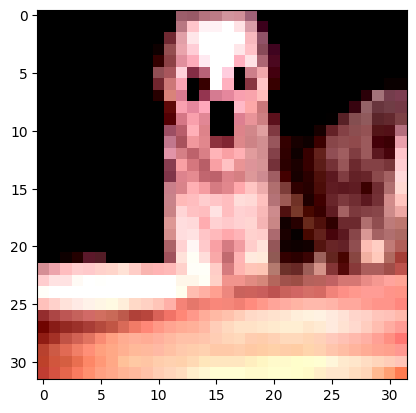

In [40]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id]]} 입니다.')
print(f'모델의 예측 : {labels[single_pred_test[id]]}')

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y[id] == single_pred_test[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()

id = 685
다음 그림은 Frog 입니다.
모델의 예측 : Bird
모델의 카테고리별 확률 : 
{'Airplane': 0.0, 'Automobile': 0.0, 'Bird': 75.0, 'Cat': 7.0, 'Deer': 15.0, 'Dog': 0.0, 'Frog': 0.0, 'Horse': 0.0, 'Ship': 0.0, 'Truck': 0.0}
틀렸어요


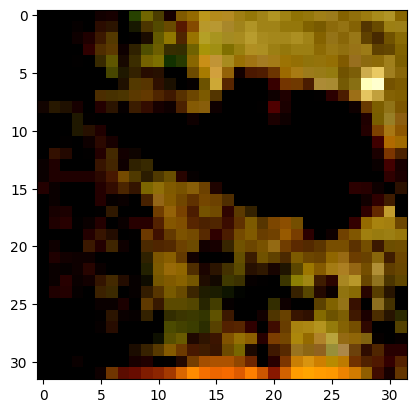

In [44]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]


print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id]]} 입니다.')
print(f'모델의 예측 : {labels[single_pred_test[id]]}')

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y[id] == single_pred_test[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()